In [46]:
textAnalyticsURL = 'textchecker.cognitiveservices.azure.com'
textAnalyticsKey = 'someKey'

In [47]:
import urllib.parse, http.client, urllib.request, urllib.error, json

headers = {
    'Content-Type' : 'application/json',
    'Ocp-Apim-Subscription-Key' : textAnalyticsKey,
    'Accept' : 'application/json'
}

body = {
    'documents' : [
        {
            'language' : 'en',
            'id' : '1',
            'text' : 'Wow! I am loving this course so much! It is great!'
        },
        {
            'language' : 'en',
            'id' : '2',
            'text' : 'This course is not working for me right now.'
        },
        {
            'language' : 'en',
            'id' : '3',
            'text' : 'I just saw a movie trailer that blew me away!.'
        },
        {
            'language' : 'nl',
            'id' : '4',
            'text' : 'Wat een plezier deze dag. Ik denk dat ik het begrijp. Het leven is prachtig!'
        } 
    ]
}

params = urllib.parse.urlencode({})

try:
    conn = http.client.HTTPSConnection(textAnalyticsURL)
    conn.request("POST", "/text/analytics/v2.0/sentiment?%s" % params, str(body), headers)
    response = conn.getresponse()
    jsonData = response.read().decode("UTF-8")
    data = json.loads(jsonData)
    print('Sentiment goes from 0 to 1, where 0 is super negative and 1 is super positive.')
    print('')
    for document in data['documents']:
        #sentiment = "positive"
        #if document['score'] <= 0.5:
        #    sentiment = "negative"
        print('Document ' + document['id'] + ' has a ' + str(document['score']) + '/1.00 sentiment')
    conn.close()
except Exception as ex:
    print(ex.strerror)

Sentiment goes from 0 to 1, where 0 is super negative and 1 is super positive.

Document 1 has a 0.996948778629303/1.00 sentiment
Document 2 has a 0.004374384880065918/1.00 sentiment
Document 3 has a 0.1295241117477417/1.00 sentiment
Document 4 has a 0.9309764504432678/1.00 sentiment


In [48]:
try:
    conn = http.client.HTTPSConnection(textAnalyticsURL)
    conn.request("POST", "/text/analytics/v2.0/keyPhrases?%s" % params, str(body), headers)
    response = conn.getresponse()
    jsonData = response.read().decode("UTF-8")
    data = json.loads(jsonData)
    for document in data['documents']:
        print('Document ' + document['id'] + ' has these key phrases:')
        for phrase in document['keyPhrases']:
            print("    " + phrase)
        print('-----------------------------------')
    conn.close()
except Exception as ex:
    print(ex.strerror)

Document 1 has these key phrases:
    Wow
    course
-----------------------------------
Document 2 has these key phrases:
    course
-----------------------------------
Document 3 has these key phrases:
    movie trailer
-----------------------------------
Document 4 has these key phrases:
    leven
    plezier
-----------------------------------


In [49]:
!curl https://www.unisi.it/sites/default/files/speech.txt -o speech.txt
document = open("speech.txt", "r")

mlk_speech = document.read()
print(mlk_speech)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   313  100   313    0     0    192      0  0:00:01  0:00:01 --:--:--   192
<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML+RDFa 1.0//EN" "http://www.w3.org/MarkUp/DTD/xhtml-rdfa-1.dtd"><html xmlns="http://www.w3.org/1999/xhtml"><head><title>404 Not Found</title></head><body><h1>Not Found</h1><p>The requested URL "/sites/default/files/speech.txt" was not found on this server.</p></body></html>


In [50]:
from string import punctuation

# remove numbers
mlk_speech = ''.join(c for c in mlk_speech if not c.isdigit())

# remove punctuation and make lower case
mlk_speech = ''.join(c for c in mlk_speech if c not in punctuation).lower()

print(mlk_speech)

doctype html public wcdtd xhtmlrdfa en httpwwwworgmarkupdtdxhtmlrdfadtdhtml xmlnshttpwwwworgxhtmlheadtitle not foundtitleheadbodyhnot foundhpthe requested url sitesdefaultfilesspeechtxt was not found on this serverpbodyhtml


In [51]:
#remove stopwords
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

mlk_speech = ' '.join([word for word in mlk_speech.split() if word not in (stopwords.words('english'))])

print(mlk_speech)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
doctype html public wcdtd xhtmlrdfa en httpwwwworgmarkupdtdxhtmlrdfadtdhtml xmlnshttpwwwworgxhtmlheadtitle foundtitleheadbodyhnot foundhpthe requested url sitesdefaultfilesspeechtxt found serverpbodyhtml


In [52]:
from nltk.stem.porter import PorterStemmer
from nltk.probability import FreqDist
import pandas as pd
nltk.download("punkt")

ps = PorterStemmer()
words = nltk.tokenize.word_tokenize(mlk_speech)
stems = [ps.stem(word) for word in words] 

fd = FreqDist(stems)
fd_df = pd.DataFrame(fd, index=[0]).T 

print(fd_df)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
                                      0
doctyp                                1
html                                  1
public                                1
wcdtd                                 1
xhtmlrdfa                             1
en                                    1
httpwwwworgmarkupdtdxhtmlrdfadtdhtml  1
xmlnshttpwwwworgxhtmlheadtitl         1
foundtitleheadbodyhnot                1
foundhpth                             1
request                               1
url                                   1
sitesdefaultfilesspeechtxt            1
found                                 1
serverpbodyhtml                       1


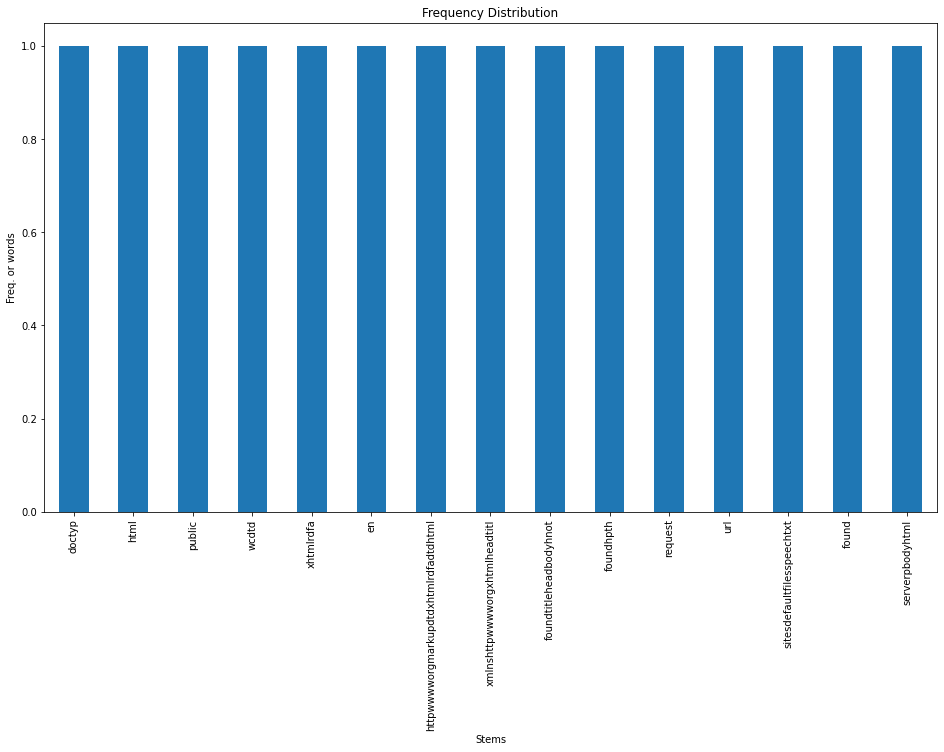

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt

counts = fd_df.sort_values(0, ascending = False)
ar = plt.figure(figsize=(16,9))
ax = ar.gca()
counts[0][:60].plot(kind='bar', ax=ax)
ax.set_title("Frequency Distribution")
ax.set_ylabel("Freq. or words")
ax.set_xlabel("Stems")
plt.show()